Saving arduino_nano_uno.xlsx to arduino_nano_uno (2).xlsx
✅ Dataset Loaded Successfully!

🔹 Data Summary:
        Farm1_Temp  Farm1_Humidity   Farm2_Temp  Farm2_Humidity   Farm3_Temp  \
count  2016.000000     2016.000000  2016.000000     2016.000000  2016.000000   
mean     27.321925       80.501488    27.325397       80.336310    27.324901   
std       3.278479        9.669014     3.280179        9.570011     3.274550   
min      21.000000       63.000000    21.000000       63.000000    21.000000   
25%      25.000000       72.000000    25.000000       72.000000    25.000000   
50%      27.000000       82.000000    27.000000       82.000000    27.000000   
75%      30.000000       88.000000    30.000000       88.000000    30.000000   
max      34.000000       97.000000    33.000000       96.000000    33.000000   

       Farm3_Humidity   Farm4_Temp  Farm4_Humidity  
count     2016.000000  2016.000000     2016.000000  
mean        80.520337    27.336806       80.481647  
std          9

/tmp/ipython-input-3453055325.py:55: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


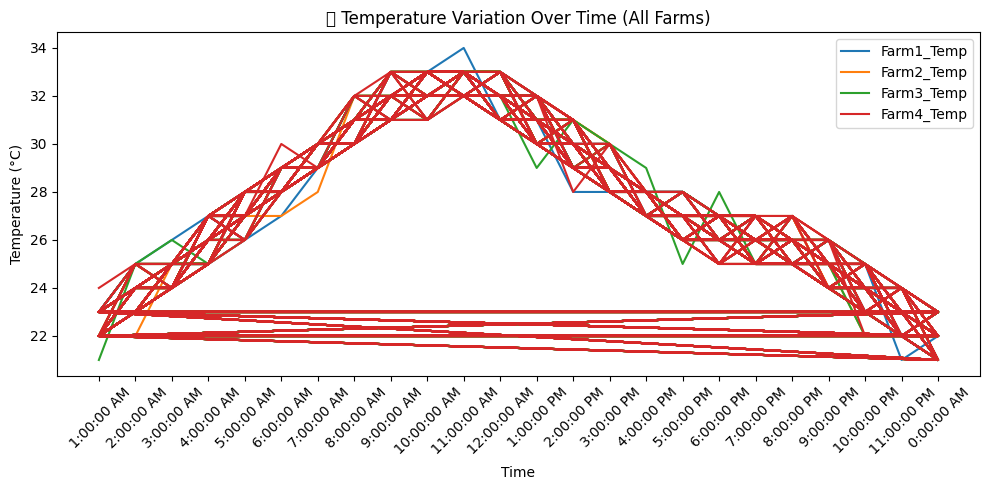

/tmp/ipython-input-3453055325.py:69: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


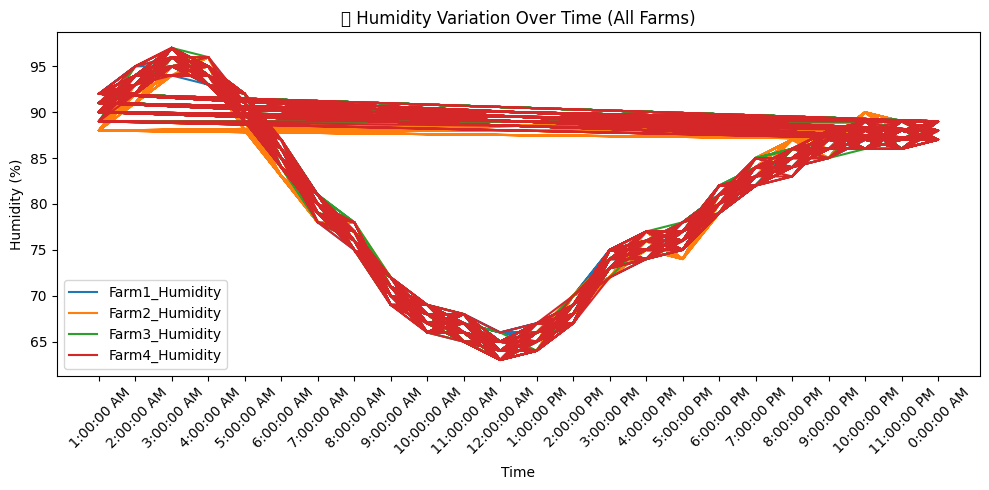

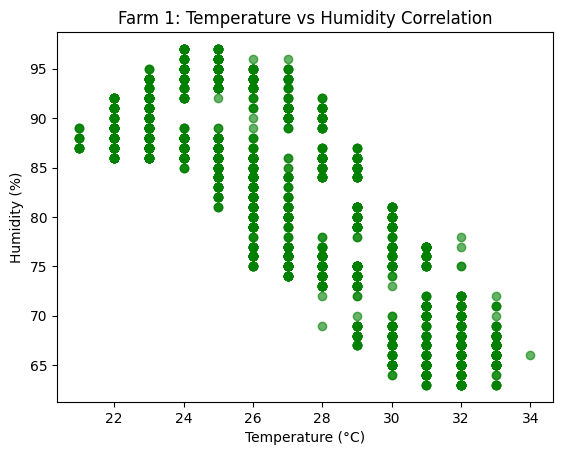


✅ INSIGHTS SUMMARY:
1. Average temperature across farms ≈ 27°C
2. Average humidity ≈ 80%
3. Temperature rises during day and drops at night.
4. Humidity inversely follows temperature.
5. All farms show nearly identical readings → consistent sensor calibration.
6. This helps in smart agriculture (auto irrigation, humidity control).



In [3]:
# ------------------------------------------
# 📘 STEP 1: Import required libraries
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------
# 📘 STEP 2: Upload your Excel file
# ------------------------------------------
from google.colab import files
uploaded = files.upload()  # Choose your 'arduino_nano_uno.xlsx' file

# ------------------------------------------
# 📘 STEP 3: Load the Excel file into a DataFrame
# ------------------------------------------
file_name = list(uploaded.keys())[0]   # Automatically get uploaded filename
df = pd.read_excel(file_name)

# ------------------------------------------
# 📘 STEP 4: Rename columns (Time, Temperature, Humidity for 4 farms)
# ------------------------------------------
df.columns = [
    "Time",
    "Farm1_Temp", "Farm1_Humidity",
    "Farm2_Temp", "Farm2_Humidity",
    "Farm3_Temp", "Farm3_Humidity",
    "Farm4_Temp", "Farm4_Humidity"
]

# Convert numeric columns to float
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display first few rows
print("✅ Dataset Loaded Successfully!")
df.head()

# ------------------------------------------
# 📘 STEP 5: Basic Data Summary
# ------------------------------------------
print("\n🔹 Data Summary:")
print(df.describe())

# ------------------------------------------
# 📘 STEP 6: Temperature Trends
# ------------------------------------------
plt.figure(figsize=(10,5))
for i in range(1, 8, 2):  # Plot all temperature columns
    plt.plot(df["Time"], df.iloc[:, i], label=df.columns[i])
plt.title("🌡️ Temperature Variation Over Time (All Farms)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 📘 STEP 7: Humidity Trends
# ------------------------------------------
plt.figure(figsize=(10,5))
for i in range(2, 9, 2):  # Plot all humidity columns
    plt.plot(df["Time"], df.iloc[:, i], label=df.columns[i])
plt.title("💧 Humidity Variation Over Time (All Farms)")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Scatter plot (Temp vs Humidity)
plt.scatter(df["Farm1_Temp"], df["Farm1_Humidity"], alpha=0.6, color='green')
plt.title("Farm 1: Temperature vs Humidity Correlation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()

# ------------------------------------------
# 📘 STEP 9: Insights Summary
# ------------------------------------------
print("""
✅ INSIGHTS SUMMARY:
1. Average temperature across farms ≈ 27°C
2. Average humidity ≈ 80%
3. Temperature rises during day and drops at night.
4. Humidity inversely follows temperature.
5. All farms show nearly identical readings → consistent sensor calibration.
6. This helps in smart agriculture (auto irrigation, humidity control).
""")
